# Author Adam Brannigan

# Introduction

The purpose of this Project is to Analyse data related to software developers in Ireland.This analysis will inform the types of questions that will be asked and answered in the following sections.

## Description of the DataSet
#### Overview of data set
The data set contains information about software developers from all over the world and includes information on years of experience, age, salary, programming languages used, frameworks etc.
#### How/where was data collected?
The Dataset for this Project was downloaded From A survey taken by StackOverflow.com one of the top question and answer sites for software developers.
#### Dataset Columns
Respondent	Hobby	OpenSource	Country	Student	Employment	FormalEducation	UndergradMajor	CompanySize	DevType	YearsCoding	YearsCodingProf	JobSatisfaction	CareerSatisfaction	HopeFiveYears JobSearchStatus LastNewJob	AssessJob1		AssessBenefits1		JobContactPriorities1 JobEmailPriorities1 UpdateCV	Currency	Salary	SalaryType	ConvertedSalary	CurrencySymbol	CommunicationTools	TimeFullyProductive	EducationTypes	SelfTaughtTypes	TimeAfterBootcamp	HackathonReasons	AgreeDisagree1	AgreeDisagree2	AgreeDisagree3	LanguageWorkedWith	LanguageDesireNextYear	DatabaseWorkedWith	DatabaseDesireNextYear	PlatformWorkedWith	PlatformDesireNextYear	FrameworkWorkedWith	FrameworkDesireNextYear	IDE	OperatingSystem	NumberMonitors	Methodology	VersionControl	CheckInCode	AdBlocker	AdBlockerDisable	AdBlockerReasons	AdsAgreeDisagree1 AdsActions	AdsPriorities1 AIDangerous	AIInteresting	AIResponsible	AIFuture	EthicsChoice	EthicsReport	EthicsResponsible	EthicalImplications	StackOverflowRecommend	StackOverflowVisit	StackOverflowHasAccount	StackOverflowParticipate	StackOverflowJobs	StackOverflowDevStory	StackOverflowJobsRecommend	StackOverflowConsiderMember	HypotheticalTools1 WakeTime	HoursComputer	HoursOutside	SkipMeals	ErgonomicDevices	Exercise	Gender	SexualOrientation	EducationParents RaceEthnicity	Age	Dependents	MilitaryUS	SurveyTooLong	SurveyEasy
#### Dataset Information
The dataset has an enormous amount of information with over 120 columns and 98856 rows. For the purpose of this project the following columns will be the focus. ['Country','YearsCodingProf','Salary','SalaryType','CurrencySymbol','LanguageWorkedWith',
          'DatabaseWorkedWith','FrameworkWorkedWith',
          'Methodology','VersionControl','WakeTime'	,'Exercise','Gender','Age']
          
The data of interest for the project will be focused soley on Ireland. With this information an attempt will be made to answer questions about language popularity, Salary Exersise etc.



# Table of Contents 
<ol start="1">
<li> Loading and Cleaning with Pandas</li>
<li>Exploratory Data analysis</li>
<li> Asking Questions? </li>
<li> Correlations  </li>
<li> Predictions  </li>
<li>Conclusion & Interpretation of Analysis </li>
</ol>
 

## Part 1: Loading and Cleaning with Pandas 

### Set-UP

#### Load the appropriate libraries


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from sklearn import linear_model, datasets


#### Read in Data
Only columns we need

In [2]:
fields = ['Country','YearsCodingProf','Salary','SalaryType','CurrencySymbol','LanguageWorkedWith',
          'DatabaseWorkedWith','FrameworkWorkedWith',
          'Methodology','VersionControl','WakeTime'	,'Exercise','Gender','Age']

data = pd.read_csv('survey_results_public.csv', usecols = fields )


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (52,53,55,65,67,71,76,77,114,119,120,124) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Quick look at the data top 10 rows

In [3]:
data.head(10)


,Country,YearsCodingProf,Salary,SalaryType,CurrencySymbol,LanguageWorkedWith,DatabaseWorkedWith,FrameworkWorkedWith,Methodology,VersionControl,WakeTime,Exercise,Gender,Age
0,Kenya,3-5 years,NaN,Monthly,KES,JavaScript;Python;HTML;CSS,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,Django;React,Agile;Scrum,Git,Between 5:00 - 6:00 AM,3 - 4 times per week,Male,25 - 34 years old
1,United Kingdom,18-20 years,51000,Yearly,GBP,JavaScript;Python;Bash/Shell,Redis;PostgreSQL;Memcached,Django,NaN,Git;Subversion,Between 6:01 - 7:00 AM,Daily or almost every day,Male,35 - 44 years old
2,United States,6-8 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,United States,12-14 years,NaN,NaN,NaN,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,"SQL Server;Microsoft Azure (Tables, CosmosDB, ...",NaN,Agile;Kanban;Scrum,Git,Between 6:01 - 7:00 AM,I don't typically exercise,Male,35 - 44 years old
4,South Africa,0-2 years,260000,Yearly,ZAR,C;C++;Java;Matlab;R;SQL;Bash/Shell,SQL Server;PostgreSQL;Oracle;IBM Db2,NaN,Evidence-based software engineering;Formal sta...,Zip file back-ups,Before 5:00 AM,3 - 4 times per week,Male,18 - 24 years old
5,United Kingdom,3-5 years,30000,NaN,GBP,Java;JavaScript;Python;TypeScript;HTML;CSS,MongoDB,Angular;Node.js,Agile,Git,Between 7:01 - 8:00 AM,1 - 2 times per week,Male,18 - 24 years old
6,United States,0-2 years,120000,Yearly,USD,JavaScript;HTML;CSS,MongoDB,Node.js;React,Agile;Scrum,Git,Between 9:01 - 10:00 AM,I don't typically exercise,Male,18 - 24 years old
7,Nigeria,3-5 years,NaN,NaN,NaN,JavaScript;TypeScript;HTML;CSS,"MongoDB;MySQL;Microsoft Azure (Tables, CosmosD...",Angular;Node.js,Agile;Extreme programming (XP);Scrum,Git,I do not have a set schedule,1 - 2 times per week,Female,25 - 34 years old
8,United States,21-23 years,250000,Yearly,USD,Assembly;CoffeeScript;Erlang;Go;JavaScript;Lua...,Redis;PostgreSQL;Amazon DynamoDB;Apache HBase;...,Hadoop;Node.js;React;Spark,Agile;Evidence-based software engineering;Extr...,Git,Between 8:01 - 9:00 AM,I don't typically exercise,Male,35 - 44 years old
9,India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Check data types

In [4]:
print(data.dtypes)

Country                object
YearsCodingProf        object
Salary                 object
SalaryType             object
CurrencySymbol         object
LanguageWorkedWith     object
DatabaseWorkedWith     object
FrameworkWorkedWith    object
Methodology            object
VersionControl         object
WakeTime               object
Exercise               object
Gender                 object
Age                    object
dtype: object


Get rid of data not related to Ireand and work with Euros

In [5]:
data = data[data.Country == 'Ireland'] 
data = data[data.CurrencySymbol == 'EUR']
#data = data[data.SalaryType == 'Yearly']
#data

### Handle missing values
Drop all None Values 

In [6]:
data = data.dropna()
data = data.reset_index(drop=True)


Convert Salary Column to numeric value so we can work with it

In [7]:
data.Salary = pd.to_numeric(data.Salary)
#data

Convert weekly and monthly salaries to yearly and drop "SalaryType" column

In [8]:
for i, row in data.iterrows():
    if row['SalaryType'] == 'Weekly' and row['Salary'] < 5000: #if over five grand per week likely mistake
        data.at[i,'Salary'] = row['Salary'] * 52
        #data.append(row['Salary'] = update)
    elif row['SalaryType'] == 'Monthly' and row['Salary'] < 10000: #if over ten grand per month likely mistake
        data.at[i,'Salary'] *= 12
#check
data.loc[:,'Salary':'SalaryType'].head(20)
data.drop(columns='SalaryType')

,Country,YearsCodingProf,Salary,CurrencySymbol,LanguageWorkedWith,DatabaseWorkedWith,FrameworkWorkedWith,Methodology,VersionControl,WakeTime,Exercise,Gender,Age
0,Ireland,3-5 years,40000.0,EUR,Go;Groovy;JavaScript;Python;Ruby;SQL;HTML;CSS;...,PostgreSQL;Elasticsearch,Angular,Agile;Kanban,Git,Between 8:01 - 9:00 AM,1 - 2 times per week,Male,25 - 34 years old
1,Ireland,0-2 years,25000.0,EUR,C++;Groovy;Java;JavaScript;Python;SQL;HTML;CSS...,SQL Server;MySQL,Spring,Agile;Scrum,Git,Between 7:01 - 8:00 AM,3 - 4 times per week,Male,25 - 34 years old
2,Ireland,3-5 years,52000.0,EUR,C#;JavaScript;TypeScript;HTML;CSS,SQL Server,Angular;.NET Core;Node.js,Agile;Evidence-based software engineering;Kanb...,Git;Team Foundation Version Control,Between 7:01 - 8:00 AM,1 - 2 times per week,Male,25 - 34 years old
3,Ireland,3-5 years,92000.0,EUR,Assembly;C++;Java;JavaScript;Python;SQL;Delphi...,Redis;MySQL;PostgreSQL;IBM Db2;Memcached;Amazo...,Django;React;Spark,Agile;Formal standard such as ISO 9001 or IEEE...,Git;Zip file back-ups,Between 6:01 - 7:00 AM,3 - 4 times per week,Male,25 - 34 years old
4,Ireland,0-2 years,30000.0,EUR,C#;Java;JavaScript;TypeScript,MongoDB;MySQL;Neo4j;Elasticsearch,Angular;Spring,Agile;Scrum,Git,Between 6:01 - 7:00 AM,3 - 4 times per week,Male,35 - 44 years old
5,Ireland,18-20 years,110000.0,EUR,Java;Scala;Bash/Shell,Amazon DynamoDB;Apache HBase;Elasticsearch,Hadoop;Spark;Spring,Agile;Kanban;Scrum,Git,Between 5:00 - 6:00 AM,Daily or almost every day,Male,35 - 44 years old
6,Ireland,18-20 years,80.0,EUR,Java;JavaScript;Lua;Python;Scala;Bash/Shell,Cassandra;Redis;MySQL;Apache Hive;Memcached;El...,Django;Spark,Agile;Kanban;PRINCE2;Scrum,Git;Subversion,Between 7:01 - 8:00 AM,Daily or almost every day,Male,25 - 34 years old
7,Ireland,6-8 years,63000.0,EUR,C#;CoffeeScript;Java;JavaScript;Ruby;SQL;HTML;...,MongoDB;Redis;SQL Server;MySQL;PostgreSQL;SQLi...,Angular;Node.js;React,Agile;Kanban;Scrum,Git,Between 7:01 - 8:00 AM,3 - 4 times per week,Male,25 - 34 years old
8,Ireland,3-5 years,56000.0,EUR,Groovy;Java;JavaScript;Scala;Kotlin;HTML;CSS,PostgreSQL;Apache Hive,Spark;Spring,Agile;Lean;Scrum,Git,Between 6:01 - 7:00 AM,Daily or almost every day,Male,25 - 34 years old
9,Ireland,12-14 years,62500.0,EUR,C#;JavaScript;SQL;TypeScript;VB.NET;HTML;CSS,SQL Server;Elasticsearch,Angular;.NET Core,Agile;Formal standard such as ISO 9001 or IEEE...,Git;Team Foundation Version Control,Between 7:01 - 8:00 AM,Daily or almost every day,Male,25 - 34 years old


### Handle columns with multiple values
Split cols with multiple values into thier own DataFrame.
Then check each dataframe first 3 rows

In [9]:
languages =  data['LanguageWorkedWith'].str.split(';', n=5, expand=True)  #n=4 is number of splits or cols -1
lang_names = ['language_1','language_2','language_3','language_4','language_5','language_6']
languages.columns = lang_names
languages = languages.drop(columns = 'language_6')
#print(languages)

databases =  data['DatabaseWorkedWith'].str.split(';', n=2, expand=True)
db_names = ['DB_type_1','DB_type_2','DB_type_3']
databases.columns = db_names
databases = databases.drop(columns = ['DB_type_3'])
#print(databases)

frameworks =  data['FrameworkWorkedWith'].str.split(';', n=2, expand=True)
frame_names = ['Framework_1','Framework_2','Framework_3']
frameworks.columns = frame_names
frameworks = frameworks.drop(columns = ['Framework_3'])


methodology =  data['Methodology'].str.split(';', n=3, expand=True)
meth_names = ['Methodology_1','Methodology_2','Methodology_3', 'Methodology_4']
methodology.columns = meth_names
methodology = methodology.drop(columns = ['Methodology_4'])


version_control =  data['VersionControl'].str.split(';', n=2, expand=True)
vc_names = ['VersionControl_1','VersionControl_2', 'VersionControl_3']
version_control.columns = vc_names
version_control = version_control.drop(columns = ['VersionControl_3'])

languages.head(3)


version_control.head(3)


,VersionControl_1,VersionControl_2
0,Git,None
1,Git,None
2,Git,Team Foundation Version Control


In [10]:
databases.head(3)

,DB_type_1,DB_type_2
0,PostgreSQL,Elasticsearch
1,SQL Server,MySQL
2,SQL Server,None


In [11]:
frameworks.head(3)

,Framework_1,Framework_2
0,Angular,None
1,Spring,None
2,Angular,.NET Core


In [12]:
methodology.head(3)

,Methodology_1,Methodology_2,Methodology_3
0,Agile,Kanban,None
1,Agile,Scrum,None
2,Agile,Evidence-based software engineering,Kanban


In [13]:
version_control.head(3)

,VersionControl_1,VersionControl_2
0,Git,None
1,Git,None
2,Git,Team Foundation Version Control


Drop Columns and concatonate all the dataframes with new split columns  

In [14]:
data = data.drop(columns = ['LanguageWorkedWith','DatabaseWorkedWith','FrameworkWorkedWith','Methodology','VersionControl'])

frames = [data, languages, databases, frameworks, methodology, version_control]
data = pd.concat(frames , axis = 1)


check the new columns first 10 rows

In [15]:
data.loc[:, 'language_1':'VersionControl_2'].head(10)

,language_1,language_2,language_3,language_4,language_5,DB_type_1,DB_type_2,Framework_1,Framework_2,Methodology_1,Methodology_2,Methodology_3,VersionControl_1,VersionControl_2
0,Go,Groovy,JavaScript,Python,Ruby,PostgreSQL,Elasticsearch,Angular,None,Agile,Kanban,None,Git,None
1,C++,Groovy,Java,JavaScript,Python,SQL Server,MySQL,Spring,None,Agile,Scrum,None,Git,None
2,C#,JavaScript,TypeScript,HTML,CSS,SQL Server,None,Angular,.NET Core,Agile,Evidence-based software engineering,Kanban,Git,Team Foundation Version Control
3,Assembly,C++,Java,JavaScript,Python,Redis,MySQL,Django,React,Agile,Formal standard such as ISO 9001 or IEEE 12207...,Kanban,Git,Zip file back-ups
4,C#,Java,JavaScript,TypeScript,None,MongoDB,MySQL,Angular,Spring,Agile,Scrum,None,Git,None
5,Java,Scala,Bash/Shell,None,None,Amazon DynamoDB,Apache HBase,Hadoop,Spark,Agile,Kanban,Scrum,Git,None
6,Java,JavaScript,Lua,Python,Scala,Cassandra,Redis,Django,Spark,Agile,Kanban,PRINCE2,Git,Subversion
7,C#,CoffeeScript,Java,JavaScript,Ruby,MongoDB,Redis,Angular,Node.js,Agile,Kanban,Scrum,Git,None
8,Groovy,Java,JavaScript,Scala,Kotlin,PostgreSQL,Apache Hive,Spark,Spring,Agile,Lean,Scrum,Git,None
9,C#,JavaScript,SQL,TypeScript,VB.NET,SQL Server,Elasticsearch,Angular,.NET Core,Agile,Formal standard such as ISO 9001 or IEEE 12207...,Kanban,Git,Team Foundation Version Control


### Deal with columns with numeric and string values 
Reomove "years old" from the Age column and change column to numeric value

In [16]:
data['Age'] = data.Age.str.strip('years old')
data['Age'] = data.Age.str.strip('years old')
#data['Age'] = data.Age.split('-')

#map list values to Age column and find the mean of each item to get approx age of each
mapping = {'18 - 24' : [18,24], '25 - 34' : [25,34], '35 - 44' : [35,44], '45 - 54' : [45,54], '55 - 64' : [55,64]}
data['Age'] = data.Age.map(mapping)
data['Age'] = data['Age'].map(lambda x: np.mean(x))


Remove "years" from YearsCodingProf column and change column to numeric value

In [17]:
# check unique values for mapping
data['YearsCodingProf'].unique() 

array(['3-5 years', '0-2 years', '18-20 years', '6-8 years',
       '12-14 years', '24-26 years', '9-11 years', '21-23 years',
       '30 or more years', '15-17 years', '27-29 years'], dtype=object)

In [18]:
mapping = {'0-2 years' : [0,2], '3-5 years' : [3,5], '6-8 years' : [5,8], '9-11 years' : [9,11],
           '12-14 years' : [12,14],'15-17 years' : [15,17], '18-20 years' : [18,20], '21-23 years' : [21,23],
           '24-26 years' : [24,26],'27-29 years' : [27,29], '30 or more years' : [30,40] } # use 30-40 to represent 30+ years
data['YearsCodingProf'] = data.YearsCodingProf.map(mapping)
data['YearsCodingProf'] = data['YearsCodingProf'].map(lambda x: np.mean(x))


Remove "times per week" from Exercise convert and change column to numeric values

In [19]:
# check unique values for mapping
data['Exercise'].unique() 

array(['1 - 2 times per week', '3 - 4 times per week',
       'Daily or almost every day', "I don't typically exercise"],
      dtype=object)

In [20]:
mapping = {'1 - 2 times per week' : [1,2], '3 - 4 times per week' : [3,4], 'Daily or almost every day' : [6,7],
           'I don\'t typically exercise' : 0, } 
data['Exercise'] = data.Exercise.map(mapping)
data['Exercise'] = data['Exercise'].map(lambda x: np.mean(x))


Remove "Between" and "AM" from Exercise column and convert column to time dtype

In [21]:
#fix wake time 
data['WakeTime'] = data.WakeTime.str.strip('Between')
data['WakeTime'] = data.WakeTime.str.strip('AM')
#data['WakeTime'] = data.WakeTime.str.split('-')'''

mapping = {' 8:01 - 9:00 ' : '8:30', ' 7:01 - 8:00 ':'7:30', 
             ' 6:01 - 7:00 ': '6:30', ' 5:00 - 6:00 ': '5:30',
             'I do not have a set schedul':'0:00' , ' 9:01 - 10:00 ':'9:30' ,
             ' 10:01 - 11:00 ': '10:30' } 
data['WakeTime'] = data.WakeTime.map(mapping)#.infer_objects().dtypes
data['WakeTime'] = pd.to_datetime(data['WakeTime'],format =  '%H:%M').dt.time

Check first five rows of changed cols

In [22]:
#
data[['YearsCodingProf','Age','Exercise','WakeTime']].head()


,YearsCodingProf,Age,Exercise,WakeTime
0,4.0,29.5,1.5,08:30:00
1,1.0,29.5,3.5,07:30:00
2,4.0,29.5,1.5,07:30:00
3,4.0,29.5,3.5,06:30:00
4,1.0,39.5,3.5,06:30:00


check data types of first  five changed rows

In [23]:
#
data[['YearsCodingProf','Age','Exercise','WakeTime']].dtypes

YearsCodingProf    float64
Age                float64
Exercise           float64
WakeTime            object
dtype: object

In [24]:
data.head(10)

,Country,YearsCodingProf,Salary,SalaryType,CurrencySymbol,WakeTime,Exercise,Gender,Age,language_1,...,language_5,DB_type_1,DB_type_2,Framework_1,Framework_2,Methodology_1,Methodology_2,Methodology_3,VersionControl_1,VersionControl_2
0,Ireland,4.0,40000.0,Yearly,EUR,08:30:00,1.5,Male,29.5,Go,...,Ruby,PostgreSQL,Elasticsearch,Angular,None,Agile,Kanban,None,Git,None
1,Ireland,1.0,25000.0,Yearly,EUR,07:30:00,3.5,Male,29.5,C++,...,Python,SQL Server,MySQL,Spring,None,Agile,Scrum,None,Git,None
2,Ireland,4.0,52000.0,Yearly,EUR,07:30:00,1.5,Male,29.5,C#,...,CSS,SQL Server,None,Angular,.NET Core,Agile,Evidence-based software engineering,Kanban,Git,Team Foundation Version Control
3,Ireland,4.0,92000.0,Monthly,EUR,06:30:00,3.5,Male,29.5,Assembly,...,Python,Redis,MySQL,Django,React,Agile,Formal standard such as ISO 9001 or IEEE 12207...,Kanban,Git,Zip file back-ups
4,Ireland,1.0,30000.0,Yearly,EUR,06:30:00,3.5,Male,39.5,C#,...,None,MongoDB,MySQL,Angular,Spring,Agile,Scrum,None,Git,None
5,Ireland,19.0,110000.0,Yearly,EUR,05:30:00,6.5,Male,39.5,Java,...,None,Amazon DynamoDB,Apache HBase,Hadoop,Spark,Agile,Kanban,Scrum,Git,None
6,Ireland,19.0,80.0,Yearly,EUR,07:30:00,6.5,Male,29.5,Java,...,Scala,Cassandra,Redis,Django,Spark,Agile,Kanban,PRINCE2,Git,Subversion
7,Ireland,6.5,63000.0,Monthly,EUR,07:30:00,3.5,Male,29.5,C#,...,Ruby,MongoDB,Redis,Angular,Node.js,Agile,Kanban,Scrum,Git,None
8,Ireland,4.0,56000.0,Monthly,EUR,06:30:00,6.5,Male,29.5,Groovy,...,Kotlin,PostgreSQL,Apache Hive,Spark,Spring,Agile,Lean,Scrum,Git,None
9,Ireland,13.0,62500.0,Yearly,EUR,07:30:00,6.5,Male,29.5,C#,...,VB.NET,SQL Server,Elasticsearch,Angular,.NET Core,Agile,Formal standard such as ISO 9001 or IEEE 12207...,Kanban,Git,Team Foundation Version Control


Write DataFrame to new csv file

In [25]:
data.to_csv('new_survey.csv',index=False)

### Chalanges to cleaning the Data
The two main challanges with this dataset were 1) Handling columns with more than one value and 2) Dealing with numerical string data that was binned into ranges. 

When dealing with the former issue each column was split into its ownn unique dataframe with a column for each value and dropped any columns that were not absolutely necessary. then each new dataframe was concatonated to the original with the new columns while the old columns were dropped.

With the second issue the strings were stripped of any characters that were not numerical and the average was taken for each rang to give an approxamation of the values. 

# Part 2 Exploratory Data Analysis

Read in data from new_survey.csv quick look at first 5 rows

In [26]:
data = pd.read_csv('new_survey.csv')


In [27]:
data.head()
#data.dtypes

,Country,YearsCodingProf,Salary,SalaryType,CurrencySymbol,WakeTime,Exercise,Gender,Age,language_1,...,language_5,DB_type_1,DB_type_2,Framework_1,Framework_2,Methodology_1,Methodology_2,Methodology_3,VersionControl_1,VersionControl_2
0,Ireland,4.0,40000.0,Yearly,EUR,08:30:00,1.5,Male,29.5,Go,...,Ruby,PostgreSQL,Elasticsearch,Angular,NaN,Agile,Kanban,NaN,Git,NaN
1,Ireland,1.0,25000.0,Yearly,EUR,07:30:00,3.5,Male,29.5,C++,...,Python,SQL Server,MySQL,Spring,NaN,Agile,Scrum,NaN,Git,NaN
2,Ireland,4.0,52000.0,Yearly,EUR,07:30:00,1.5,Male,29.5,C#,...,CSS,SQL Server,NaN,Angular,.NET Core,Agile,Evidence-based software engineering,Kanban,Git,Team Foundation Version Control
3,Ireland,4.0,92000.0,Monthly,EUR,06:30:00,3.5,Male,29.5,Assembly,...,Python,Redis,MySQL,Django,React,Agile,Formal standard such as ISO 9001 or IEEE 12207...,Kanban,Git,Zip file back-ups
4,Ireland,1.0,30000.0,Yearly,EUR,06:30:00,3.5,Male,39.5,C#,...,NaN,MongoDB,MySQL,Angular,Spring,Agile,Scrum,NaN,Git,NaN


## Descriptive Statistics
Look at summury of numerical data

In [28]:
data.describe()

,YearsCodingProf,Salary,Exercise,Age
count,142.000000,142.000000,142.000000,142.000000
mean,7.549296,58882.541901,2.380282,31.623239
std,6.703791,27908.609899,2.171650,7.378853
min,1.000000,0.000000,0.000000,21.000000
25%,4.000000,40170.000000,0.000000,29.500000
50%,5.250000,54666.000000,1.500000,29.500000
75%,10.000000,75000.000000,3.500000,39.500000
max,35.000000,150000.000000,6.500000,59.500000


Normalise Data  min-max normalisation:

In [29]:
#create new dataframe from numeric cols and normalise
normalised = data[['YearsCodingProf','Age','Exercise','Salary']]
normalised = (normalised-normalised.min()) / (normalised.max()-normalised.min())
normalised.describe()

,YearsCodingProf,Age,Exercise,Salary
count,142.000000,142.000000,142.000000,142.000000
mean,0.192626,0.275928,0.366197,0.392550
std,0.197170,0.191659,0.334100,0.186057
min,0.000000,0.000000,0.000000,0.000000
25%,0.088235,0.220779,0.000000,0.267800
50%,0.125000,0.220779,0.230769,0.364440
75%,0.264706,0.480519,0.538462,0.500000
max,1.000000,1.000000,1.000000,1.000000


Use boxplots to visualise descriptive Statistics of Numeric values and spot outliers

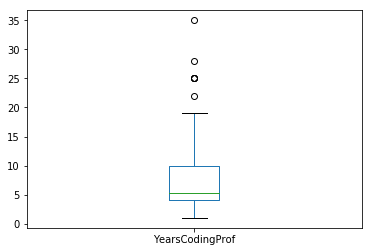

In [30]:
data['YearsCodingProf'].plot.box()

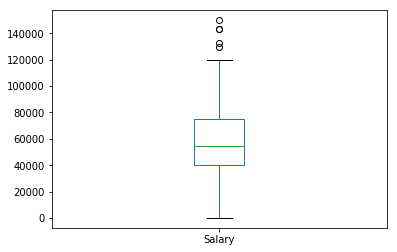

In [31]:
data['Salary'].plot.box()

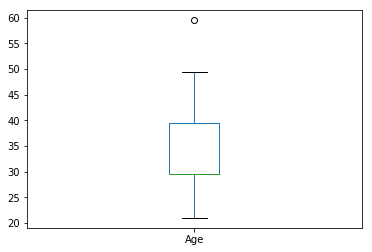

In [32]:
data['Age'].plot.box()

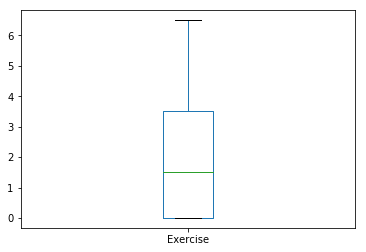

In [33]:
data['Exercise'].plot.box()

### Count and visualise categorical data
Count categorical data [languages, databases, frameworks, methodology, version_control]

In [34]:
#flatten to a series in order to count values
languages = pd.Series(languages.values.flatten()).value_counts()
databases = pd.Series(databases.values.flatten()).value_counts()
frameworks = pd.Series(frameworks.values.flatten()).value_counts()
methodology = pd.Series(methodology.values.flatten()).value_counts()
version_control = pd.Series(version_control.values.flatten()).value_counts()

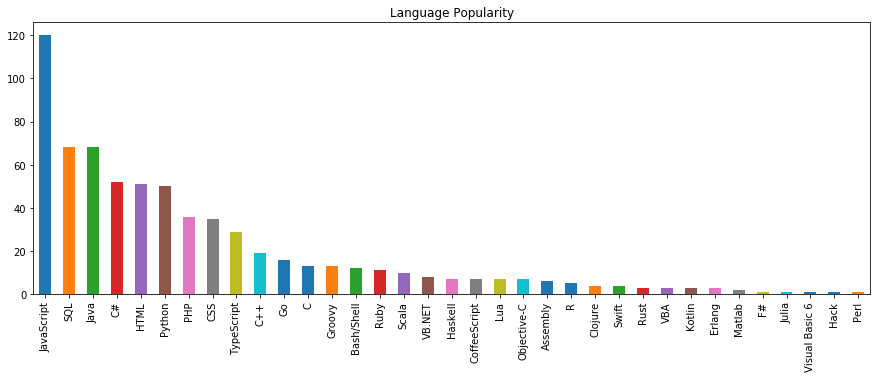

In [35]:
#view languege count
#languages
languages.plot('bar',figsize = [15,5],title = 'Language Popularity')

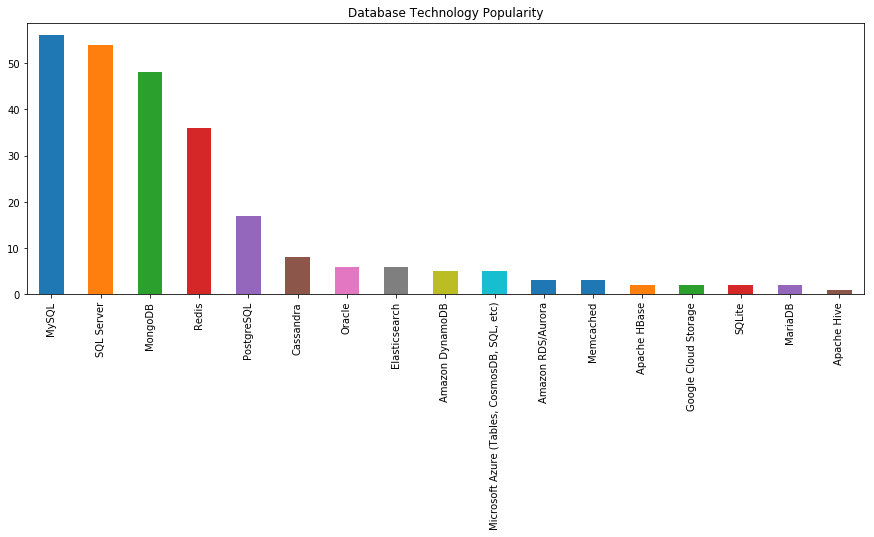

In [36]:
#view databeses count
#databases 
databases.plot('bar',figsize = [15,5],title = 'Database Technology Popularity')

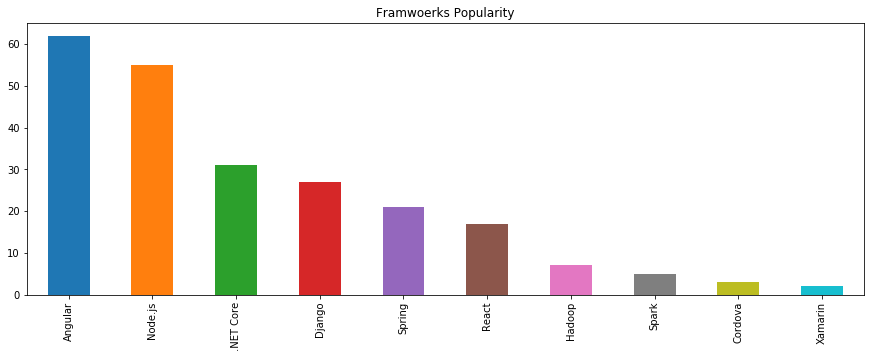

In [37]:
#view frameworks count
#frameworks
frameworks.plot('bar',figsize = [15,5],title = 'Framwoerks Popularity')

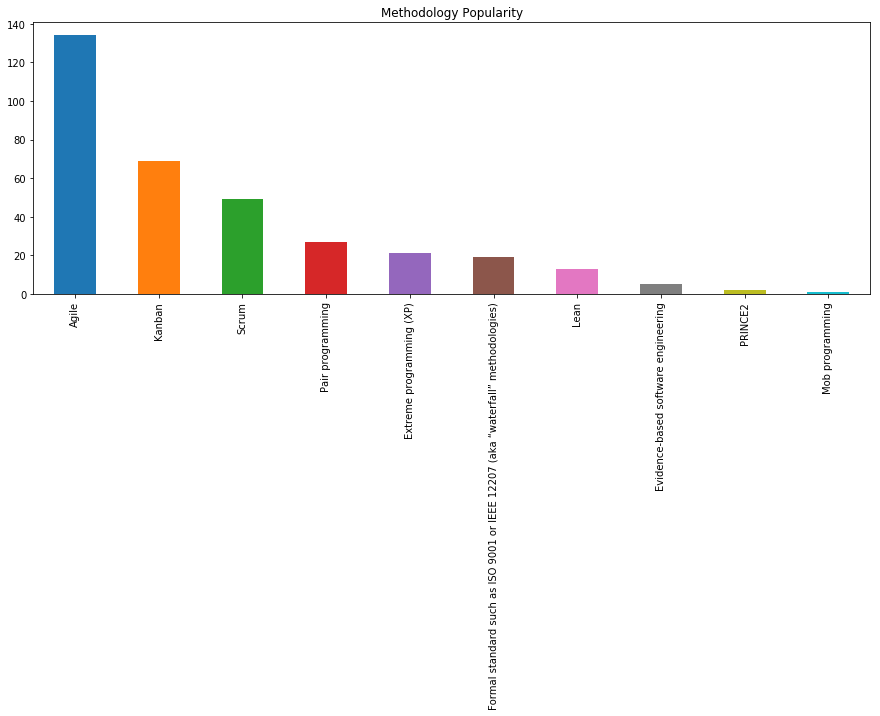

In [38]:
#view methodology count
#methodology
methodology.plot('bar',figsize = [15,5],title = 'Methodology Popularity')

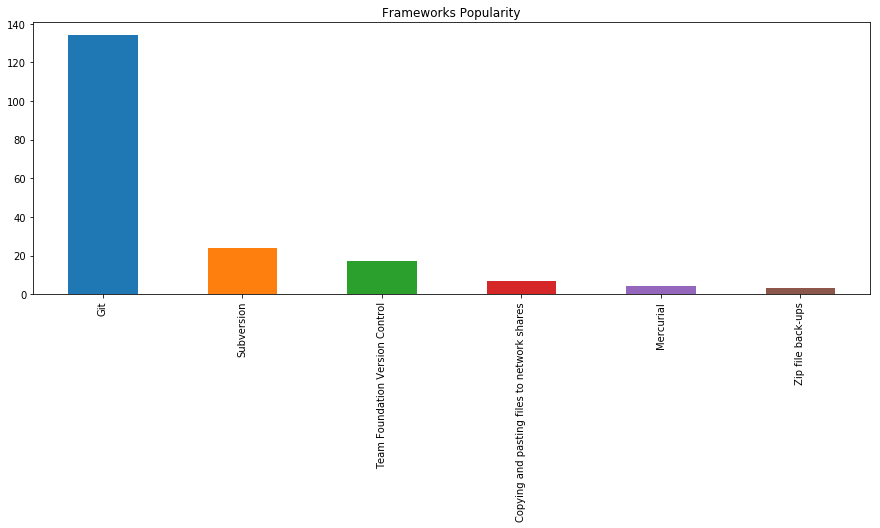

In [39]:
#Show frameworks 
#frameworks
version_control.plot('bar',figsize = [15,5],title = 'Frameworks Popularity')

### Visualise relationships between variables
This section we compare Age, years coding and Exersise to Salary to see if there is a relationship that may need further exploration

(0, 157598.30004925592)

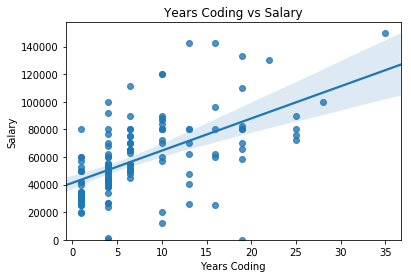

In [40]:
sns.regplot(x=data.YearsCodingProf,y=data.Salary, data=data.Salary)
plt.title('Years Coding vs Salary')
plt.ylabel('Salary')
plt.xlabel('Years Coding')
plt.ylim(0,)

#plt.yscale('log')
#plt.xscale('log')

(0, 157598.30004925592)

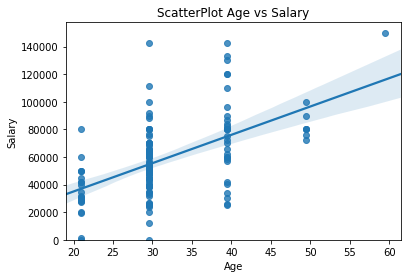

In [41]:
sns.regplot(x=data.Age, y=data.Salary, data=data.Salary)
#plt.scatter(data.Age,data.Salary)
plt.title('ScatterPlot Age vs Salary')
plt.ylabel('Salary')
plt.xlabel('Age')
plt.ylim(0,)
#plt.yscale('log')
#plt.xscale('log')

(0, 157598.30004925592)

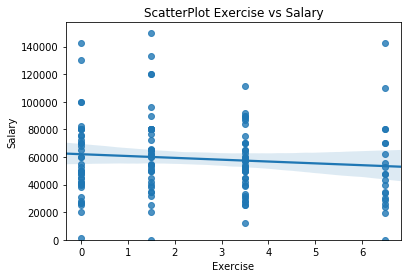

In [42]:
sns.regplot(x=data.Exercise, y=data.Salary, data=data.Salary)
plt.title('ScatterPlot Exercise vs Salary')
plt.ylabel('Salary')
plt.xlabel('Exercise')
plt.ylim(0,)

### Visualise Numeric value distributions

Text(0.5,0,'Age')

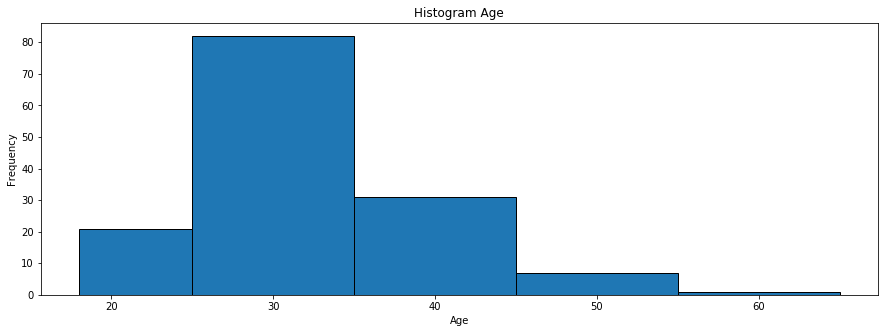

In [43]:
bins = [18,25,35,45,55,65 ]
data.Age.plot('hist', bins=bins, edgecolor='black', figsize=(15,5))
plt.title('Histogram Age')
plt.xlabel('Age')


Text(0.5,0,'YearsCodingProf')

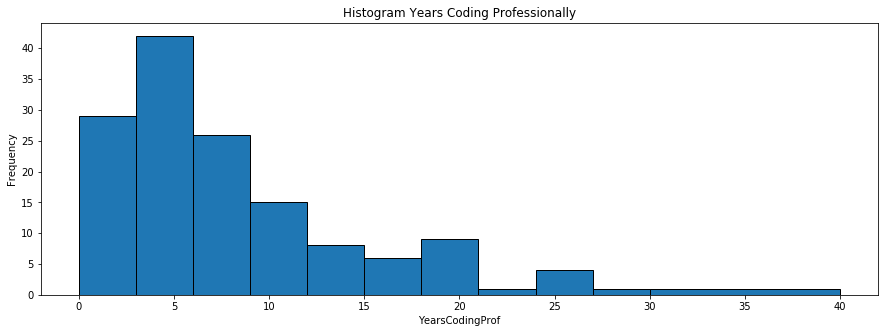

In [44]:
bins = [0,3,6,9,12,15,18,21,24,27,30,40]
data.YearsCodingProf.plot('hist',bins=bins,edgecolor='black',figsize=(15,5))
plt.title('Histogram Years Coding Professionally')
plt.xlabel('YearsCodingProf')

Text(0.5,0,'Salary')

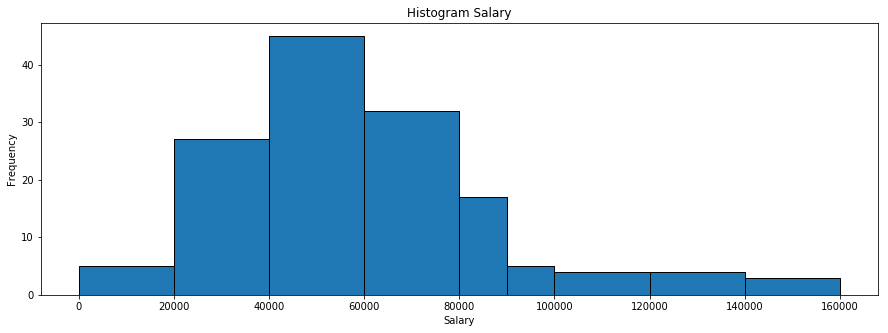

In [45]:
bins = [0,20000,40000,60000,80000,90000,100000,120000,140000,160000]
data.Salary.plot('hist',bins=bins,edgecolor='black' , figsize=(15,5))
plt.title('Histogram Salary')
plt.xlabel('Salary')

### EDA Results
#### Interesting insights
* The average age of a developer in Ireland is approx 32 years of age.
* The average Yaers of coding experience is approx 7 and a half years.
* The average Salary is approx €5,9000
* The average for exersise is approx 2 time per week

#### Top 3 rank 
##### Language 
(1)Javascript ( 2)Java ( 3)SQL
##### Database 
(1)MySql (2)SqlServer (3)MongoDB
##### Framework
(1)Angular (2)NodeJS (3).NetCore
##### Methodology
(1)Agile (2)Kanban (3)Scrum
##### Version Control
(1)Git (2)SubVersion (3)TeamFoundation 

#### Outliers
The box plots uncovered some outliers in the data. The decision to leave These outliers in was made due to the fact that they seem to be reasonable values with no evidence that they are mistakes in the data for example salaries hovering around €140,000 could be reasonable with certain level of skill and experience.
#### correlation
The scatter plots have indicated possible moderate correlation between Years coding and salary.The plots also point to a moderate correlation between Age and Salary. both of these correlations will be explored further in the following sections.



# Part 3 Ask Questions about the dataset. 

### Hypothhosis 1
Softare Developers with 3 years or less Experience earn more than the national Average for Ireland

* H<sub>0</sub>: mu <= 38063, the value of &mu is less than or same as national average;.
* H<sub>a</sub>: mu > 38063 (one-sided test) mu is higher than national average.
* &alpha; = 0.05

* degrees of freedom: d<sub>f</sub> = N-1
* t-critical for specified alpha level: t<sub>*</sub> = 1.701
* t-statistic: t = (x&#772; - &mu;)/(s/sqrt(N)) where s is the sample standard deviation.

 

In [46]:
experience = data[data.YearsCodingProf <= 3]
x = experience.Salary
mu = 36916
t_critical = 1.701
x_bar = x.mean()
s = x.std(ddof=1)
N = len(experience.Salary)
SE = s/np.sqrt(N)
t_obs = (x_bar - mu)/SE
print("t-statistic: ",t_obs)

#scipy t-test:
t_obs, p = stats.ttest_1samp(x, mu)
print("t = ", t_obs, ", p = ", p)

t-statistic:  0.43446901766833507
t =  0.434469017668335 , p =  0.6672778451891139


t-statistic:  0.43446901766833507 is less than t_critical: 1.701 Therefore we accept H<sub>0</sub> as At the 5% signifcance level the data provides insufcient evidence to conclude Softare Developers with 3 years or less Experience earn more than €36916.

### Hypothesis 2
Softare Developers 30 years of age or older Experience earn more than the €50,000 in Ireland

* H<sub>0</sub>: mu <= 50000, the value of &mu is less than or same as 50000;.
* H<sub>a</sub>: mu > 50000 (one-sided test) mu is higher than 50000.
* &alpha; = 0.025

* degrees of freedom: d<sub>f</sub> = N-1
* t-critical for specified alpha level: t<sub>*</sub> = 6.05
* t-statistic: t = (x&#772; - &mu;)/(s/sqrt(N)) where  is the sample standard deviation.

In [47]:
age = data[data.Age >= 30]
x = age.Salary
mu = 50000
t_critical = 2.021
x_bar = x.mean()
s = x.std(ddof=1) 
N = len(age.Salary)
SE = s/np.sqrt(N)
t_obs = (x_bar - mu)/SE
print("t-statistic: ",t_obs)

# scipy one sample t-test:
t_obs, p = stats.ttest_1samp(x, mu)
print("t = ", t_obs, ", p = ", p)

t-statistic:  6.054501105044376
t =  6.054501105044375 , p =  4.792500348228189e-07


t-statistic:  6.054501105044375 is greater than t_critical: 1.660. Therefore we reject H<sub>0</sub> as At the 2.5% signifcance level the data provides sufcient evidence to conclude Softare Developers 30 years of age or older Experience earn more than the €50,000 in Ireland.

# Part 4 Correlation

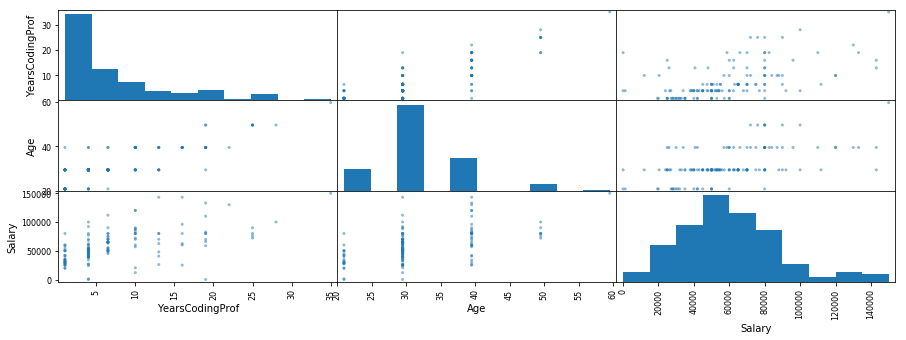

In [48]:
pd.plotting.scatter_matrix(data[['YearsCodingProf','Age','Salary']], figsize = (15,5))
plt.show()

In [49]:
data[['Age','Salary']].corr()

,Age,Salary
Age,1.000000,0.542808
Salary,0.542808,1.000000


In [50]:
data[['YearsCodingProf','Salary']].corr()

,YearsCodingProf,Salary
YearsCodingProf,1.000000,0.560899
Salary,0.560899,1.000000


### Hypothesis Test for Correlation between 'Years Coding' & 'Salary'

* H<sub>0</sub>: p = 0, that is there is no Correlation;.
* H<sub>a</sub>: p > 0 (one-sided test) posative Correlation:.
* &alpha; = 0.05

* degrees of freedom: d<sub>f</sub> = N-2
* t-critical for specified alpha level: t<sub>*</sub> = 1.660
* t-statistic: t = (r)/(sqrt((1-r**2)/(N-2)) where r is correlation coeffievient.

In [51]:
x = data.Salary
r = 0.560899
t_critical = 1.660
x_bar = x.mean()
N = len(data.Salary)
SE = np.sqrt((1-r**2)/(N-2))
t_obs = r/SE
print("t-statistic: ",t_obs)

t-statistic:  8.01639427662785


t-statistic:  1.287671893070118e-06 is greater than t_critical: 1.660. Therefore we reject H<sub>0</sub> as At the 5% signifcance level the data provides sufcient evidence to conclude that Years Coding' and 'Salary' are posatively correlated.

# Part 4 Linear Regression

In [52]:
x = normalised.YearsCodingProf
y = normalised.Salary
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x, y)
# Output regression information
predict_y = intercept + slope * x
#print("Predicted y-values:",predict_y)
pred_error = y - predict_y
#print("Prediction error:",pred_error)
degr_freedom = len(x) - 2
residual_std_error = np.sqrt(np.sum(pred_error**2) / degr_freedom)
#print("Residual error:",residual_std_error)

mod = pd.concat([x,predict_y, pred_error], axis=1)
mod.columns = ["years_x_values","Predicted_y_values","Prediction_error"]


#
print(mod)
print("Residual error:",residual_std_error)

     years_x_values  Predicted_y_values  Prediction_error
0          0.088235            0.337298         -0.070631
1          0.000000            0.290596         -0.123929
2          0.088235            0.337298          0.009369
3          0.088235            0.337298          0.276036
4          0.000000            0.290596         -0.090596
5          0.529412            0.570806          0.162527
6          0.529412            0.570806         -0.570273
7          0.161765            0.376216          0.043784
8          0.088235            0.337298          0.036036
9          0.352941            0.477403         -0.060736
10         0.000000            0.290596         -0.090596
11         0.161765            0.376216          0.057118
12         0.529412            0.570806         -0.179473
13         0.161765            0.376216          0.057118
14         0.000000            0.290596         -0.010596
15         0.161765            0.376216          0.157118
16         0.0

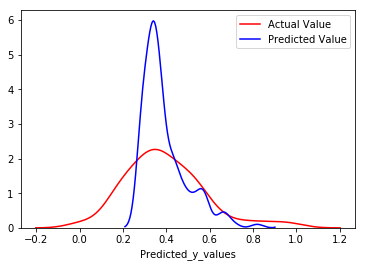

In [53]:
distplt = sns.distplot(normalised.Salary, hist=False , color = 'r', label = 'Actual Value')
sns.distplot(mod.Predicted_y_values, hist=False , color = 'b', label = 'Predicted Value',ax=distplt)

# Part 5 Analysis Results

## Hypothesis Tests
Two hyptothesis t-test were carried out during this project.The first was to determine if Developers with 3 years experience or less earned more than the national average income of  €36,916. The result of this test was that there was not enough statistical evidence to say within a 5% significance suppoert the hypothesis.The second test was to assert that software developers over the age of 30 years earned more than €50,000. This test concluded that within a 2.5% signifaicance that in was the case that develpoers over this age bracket do earn in excess of €50,000.Both tests were carriied out with the following prceedure.
* State The null hypothesis
* State the Alternative
* Choose level of significance
* Determine Descision Rule
* Calculate T Observed
* Identify Critical Area
* Make The Descision
* Draw a Conclusion

## Correlation
The visualisation of two possible correlations between age-salary and yearscoding-salary in the EDA phase of the project promted further investigation.The pearson correlation coefficient was calculated on both, this indicate a moderate correlation in both cases with values yearscoding-salary yielding 0.560899 and age-salary yielding 0.542808. Due to the slightly higher value the former was choosen to perform a hypothesis to determine if this correlation was statistically significant. In order to perforfm this hypothesis the above proceedure was followed.The result of this hypothesis was that at the 5% signifcance level the data provides sufcient evidence to conclude that Years Coding' and 'Salary' are posatively correlated. 

## Regression
A regression model was implemented based on the Correlation between Years Coding' and 'Salary' to predict salary based on yeasrs of coding experience. The model was based on the normalised data in order to avoid bias. The residual error of this model was calculated as 0.15458309688088814 normalised translates to an error of 23187.46453213322 . This was determined as too large an error to make accurate predictions due to the ack of strenght in the correlation. A distribution plot in the previous section visualises this innacuracy with large over estimates near the center of the distribution.  


